In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/rachyc/Documents/MMAI/MBAN6110/sales_data.csv')

In [3]:
df

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_1,72.87,10.0,2022-01-01
1,Product_40,Region_2,46.19,10.0,2022-01-02
2,Product_1,Region_5,NaN,4.0,2022-01-03
3,Product_6,Region_8,143.47,8.0,2022-01-04
4,Product_44,Region_4,122.54,10.0,2022-01-05
...,...,...,...,...,...
1045,Product_42,Region_3,18.63,9.0,2023-07-10
1046,Product_4,Region_3,159.27,10.0,2024-07-14
1047,Product_43,Region_1,2.91,13.0,2023-08-17
1048,Product_27,Region_7,1.96,8.0,2024-03-10


In [4]:
df.groupby('Region')['Units Sold'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Region_1,82.0,10.329268,3.527860,2.0,8.00,10.5,13.00,21.0
Region_10,81.0,9.814815,3.369388,4.0,8.00,10.0,12.00,19.0
Region_2,92.0,10.413043,2.875253,5.0,8.75,10.0,12.00,17.0
Region_3,78.0,9.807692,3.137779,4.0,8.00,10.0,11.75,18.0
Region_4,79.0,10.227848,3.108918,2.0,8.00,10.0,12.00,16.0
Region_5,103.0,9.941748,3.333800,3.0,7.00,10.0,12.00,18.0
Region_6,71.0,10.394366,2.983186,4.0,9.00,10.0,12.00,18.0
Region_7,85.0,10.894118,3.712987,3.0,8.00,11.0,13.00,22.0
Region_8,84.0,10.642857,3.364030,3.0,8.75,11.0,12.25,20.0


In [5]:
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,942,945.000000,943.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_4,Region_5,NaN,NaN,2023-07-31
freq,30,112,NaN,NaN,2
mean,NaN,NaN,108.628011,10.200424,NaN
std,NaN,NaN,167.350086,3.247589,NaN
min,NaN,NaN,0.190000,2.000000,NaN
25%,NaN,NaN,26.420000,8.000000,NaN
50%,NaN,NaN,64.640000,10.000000,NaN
75%,NaN,NaN,142.310000,12.000000,NaN


<Axes: xlabel='Units Sold', ylabel='Count'>

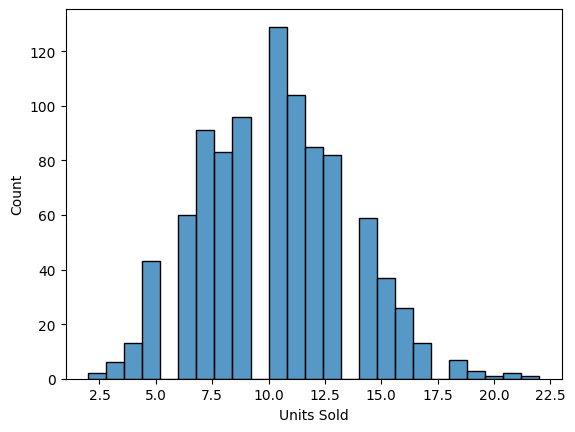

In [6]:
sns.histplot(df['Units Sold'])

In [7]:
df[df['Units Sold']>20.0]

,Product,Region,Price,Units Sold,Sale Date
436,Product_18,Region_1,NaN,21.0,2023-03-13
559,Product_4,Region_7,9.33,22.0,2023-07-14
712,Product_12,Region_1,127.89,21.0,2023-12-14


In [8]:
df_noout = df.set_index("Units Sold").drop(22.0)

<Axes: xlabel='Units Sold', ylabel='Count'>

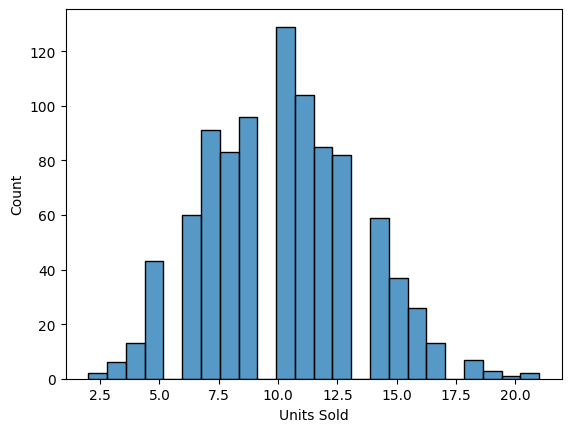

In [9]:
sns.histplot(df_noout.reset_index()['Units Sold'])

<Axes: xlabel='Product', ylabel='Price'>

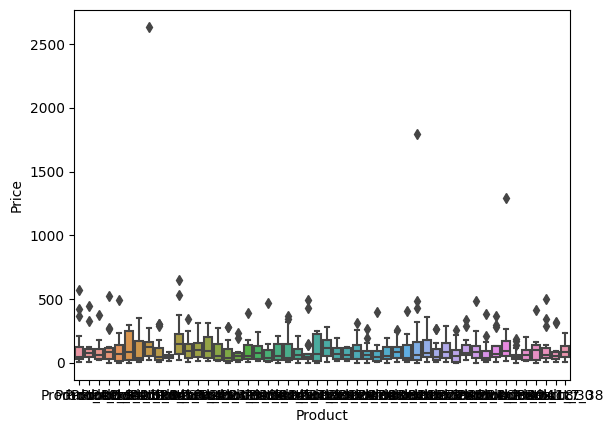

In [10]:
sns.boxplot(data= df_noout, x='Product',y='Price')

In [11]:
df[df['Price']>1000]

,Product,Region,Price,Units Sold,Sale Date
269,Product_49,Region_8,1296.0,14.0,2022-09-27
407,Product_27,Region_7,1793.9,9.0,2023-02-12
421,Product_34,Region_2,2636.9,14.0,2023-02-26
1026,NaN,Region_5,2544.6,15.0,2023-02-22


In [12]:
df_noout=df.set_index('Price').drop([1296.0]).drop([1793.9]).drop([2544.6]).drop([2636.9])

<Axes: xlabel='Product', ylabel='Price'>

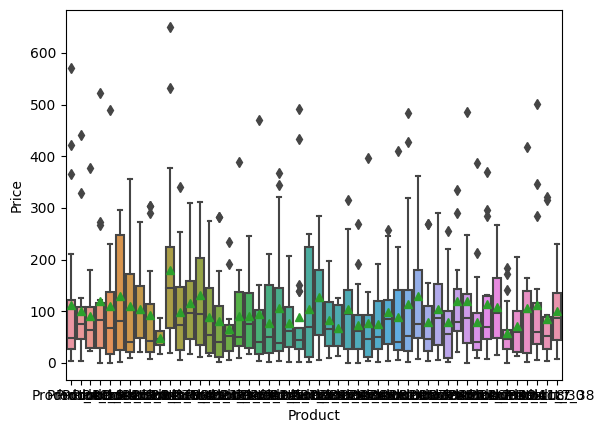

In [13]:
sns.boxplot(data= df_noout.reset_index(), x='Product',y='Price', showmeans=True)

In [14]:
df_noout.reset_index(inplace=True)

In [15]:
df_noout.drop_duplicates(inplace=True)

In [16]:
df_noout.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 0 to 996
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       897 non-null    float64
 1   Product     897 non-null    object 
 2   Region      897 non-null    object 
 3   Units Sold  897 non-null    float64
 4   Sale Date   997 non-null    object 
dtypes: float64(2), object(3)
memory usage: 46.7+ KB


In [17]:
df_noout.groupby('Region')['Price'].median()

Region
Region_1     74.34
Region_10    67.90
Region_2     66.96
Region_3     58.72
Region_4     48.33
Region_5     76.14
Region_6     57.13
Region_7     51.20
Region_8     75.88
Region_9     66.53
Name: Price, dtype: float64

In [18]:
df_noout.groupby('Region')['Units Sold'].median()

Region
Region_1     10.0
Region_10    10.0
Region_2     10.0
Region_3     10.0
Region_4     10.0
Region_5     10.0
Region_6     10.0
Region_7     11.0
Region_8     11.0
Region_9     10.0
Name: Units Sold, dtype: float64

In [19]:
df_noout['Price'] = df_noout['Price'].fillna(df_noout.groupby('Product')['Price'].transform('median'))

In [20]:
df_noout['Product'] = df_noout['Product'].fillna('Unknown')

In [21]:
df_noout['Region'] = df_noout['Region'].fillna('Unknown')

In [22]:
df_noout['Units Sold'] = df_noout['Units Sold'].fillna(df_noout.groupby('Product')['Units Sold'].transform('median'))

In [23]:
df_noout.dropna(subset='Price',inplace=True)

In [24]:
df_noout.info()

<class 'pandas.core.frame.DataFrame'>
Index: 986 entries, 0 to 996
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       986 non-null    float64
 1   Product     986 non-null    object 
 2   Region      986 non-null    object 
 3   Units Sold  986 non-null    float64
 4   Sale Date   986 non-null    object 
dtypes: float64(2), object(3)
memory usage: 46.2+ KB


In [25]:
df_noout

,Price,Product,Region,Units Sold,Sale Date
0,72.870,Unknown,Region_1,10.0,2022-01-01
1,46.190,Product_40,Region_2,10.0,2022-01-02
2,77.935,Product_1,Region_5,4.0,2022-01-03
3,143.470,Product_6,Region_8,8.0,2022-01-04
4,122.540,Product_44,Region_4,10.0,2022-01-05
...,...,...,...,...,...
992,13.160,Product_41,Region_5,7.0,2024-09-22
993,70.220,Product_34,Region_8,15.0,2024-09-23
994,42.790,Product_3,Region_9,7.0,2024-09-24
995,44.680,Product_38,Region_7,16.0,2024-09-25


In [26]:
df_noout.groupby('Region')['Units Sold'].mean()

Region
Region_1     10.305882
Region_10     9.755814
Region_2     10.302198
Region_3      9.893750
Region_4     10.215909
Region_5      9.841346
Region_6     10.402439
Region_7     10.750000
Region_8     10.472826
Region_9      9.947368
Unknown       9.833333
Name: Units Sold, dtype: float64

In [27]:
df_noout.groupby('Region')['Units Sold'].median()

Region
Region_1     10.0
Region_10    10.0
Region_2     10.0
Region_3     10.0
Region_4     10.0
Region_5     10.0
Region_6     10.0
Region_7     10.0
Region_8     10.5
Region_9     10.0
Unknown      10.0
Name: Units Sold, dtype: float64

In [28]:
df_noout.groupby('Product')['Units Sold'].median()

Product
Product_1     11.0
Product_10    12.0
Product_11    11.5
Product_12    10.0
Product_13    10.0
Product_14    11.0
Product_15    11.0
Product_16    11.5
Product_17    10.0
Product_18    12.5
Product_19    11.0
Product_2     10.0
Product_20     9.0
Product_21    10.0
Product_22    11.0
Product_23    10.0
Product_24    11.0
Product_25     9.0
Product_26    10.0
Product_27     8.0
Product_28    11.0
Product_29    11.0
Product_3     10.0
Product_30     9.0
Product_31     8.5
Product_32    12.0
Product_33     9.0
Product_34     9.0
Product_35    10.5
Product_36     9.5
Product_37    10.0
Product_38    10.0
Product_39     8.0
Product_4      9.0
Product_40    11.0
Product_41    11.0
Product_42    11.0
Product_43     9.0
Product_44    10.0
Product_45    10.5
Product_46     9.0
Product_47    10.0
Product_48    10.0
Product_49    10.0
Product_5     10.0
Product_50     8.0
Product_6      9.5
Product_7     10.0
Product_8     10.0
Product_9     10.0
Unknown       10.0
Name: Units Sold, dtype

In [29]:
df_noout.describe(include='all')

,Price,Product,Region,Units Sold,Sale Date
count,986.000000,986,986,986.000000,986
unique,NaN,51,11,NaN,986
top,NaN,Unknown,Region_5,NaN,2022-01-01
freq,NaN,89,104,NaN,1
mean,97.154270,NaN,NaN,10.146552,NaN
std,98.132852,NaN,NaN,3.120844,NaN
min,0.190000,NaN,NaN,2.000000,NaN
25%,30.085000,NaN,NaN,8.000000,NaN
50%,64.225000,NaN,NaN,10.000000,NaN
75%,128.782500,NaN,NaN,12.000000,NaN


In [30]:
#1) What conclusions can you draw about sales performance of various products and regions?

#-The product 18 has the highest sales across all the regions.
#-The product 27,39,50 have the lowest sales across all the regions.
#-The Region 5 has the highest sale prices. However, 8 and 7 regions have the highest units sold compared to other regions.
#-The Region 10 has the lowest units sold.
#-The mean price for both region and product is higher than the median.

#2) What recommendations do you have for the business?

#-Promote and expand sales of product 18 as it has consistently performed well in all regions.
#-Analyze the reasons behind the low sales of product 27,39,50 and consider strategies to improve their performance or discontinue it.
#-Study the factors contributing to high sales in Region 8,7 and replicate those strategies elsewhere.
#-In Region 10, improve sales and performance by implementing targeted marketing and sales initiatives.
#-By examining the data, it is evident that the mean price for both region and product is higher than the median. 
#This indicates that only a small portion of customers tend to spend a significant amount of money on the product.
#However, the majority of customers tend to spend around the median value. These findings suggest that the company can consider offering targeted promotions to those customers to make more purchases.

#3) Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?

#-In the data cleaning process, for missing data in "Price", using .fillna to fillin with the 'median' price by product. 
# For missing data in "Units Sold", using .fillna to fillin with the 'median' units sold by product.
# It was chosen this way to preserve data trends without introducing significant bias.
#-For missing data in "Region" and "Product", I filled those missing datas by using "Unknown"since missing data from those two columns provises less information.
#-To identify outliers, I utilized "histplot" and "boxplot" visualizations. 
# For one of the unit price counts that had less impact on our analysis, I removed the outliers using the "drop" function. 
# Similarly, I also excluded outliers from the product prices that were significantly higher than the average. These outliers may have minimal impact on our analysis, thus they were removed.
# The reason for using "histplot" and "boxplot" is that they provide effective visualizations for identifying outliers.
#-For duplicates, I used drop.duplicate to drop them.


